# Personal Annual Income Forecast



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from alive_progress import alive_bar
from matplotlib import pyplot as plt

## Dataset
The analysis uses the Adult Income dataset, a real-world dataset for income prediction:

### Adult Dataset
- **Source**: Becker, B. & Kohavi, R. (1996). Adult [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20
- **Features**: 14 attributes including:
  - **Numerical Features**: age, education-num, capital-gain, capital-loss, hours-per-week
  - **Categorical Features**: workclass, education, marital-status, occupation, relationship, race, sex, native-country
- **Target Variable**: Income level (>50K, ≤50K)
- **Samples**: 48,842 instances
- **Characteristics**: 
  - Imbalanced dataset
  - Mix of categorical and numerical features
  - Real-world data with missing values

In [2]:
df = pd.read_csv("adult.data",
                names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race",
                        "sex","capital-gain","capital-loss","hours-per-week","native-country","class"])

In [3]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

<Axes: xlabel='count', ylabel='class'>

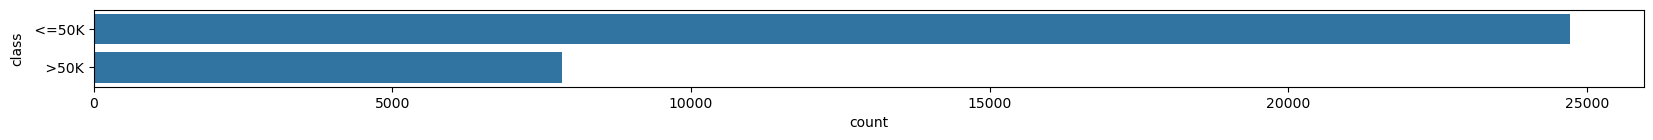

In [5]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='class', data=df)

In [6]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [7]:
drop_element = ['class']
y=df['class']
x=df.drop(drop_element,axis=1)
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5


In [8]:
from sklearn.metrics import accuracy_score, f1_score
from alive_progress import alive_bar
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

names=[
    'AdaBoost',
    'XGB',
    'LGBM',
    'CatBoost'
]


models = [
    AdaBoostClassifier(n_estimators=100, algorithm='SAMME'),
    xgb.XGBClassifier(n_estimators=100, eval_metric='logloss'),
    lgb.LGBMClassifier(n_estimators=100, verbose=-1),
    cat.CatBoostClassifier(n_estimators=100, verbose=0),
]

def scoring_f1(X_train, X_valid, Y_train, Y_valid, model,name) :
    model.fit(X_train, Y_train)
    preds = model.predict(X_valid)
    score = model.score(X_valid, y_valid)
    f1score = f1_score(Y_valid, preds)
    string = str(name)+":"+str(score)
    f1_string = str(name)+":"+str(f1score)
    return f1_string, string

f1_list=[]
acc_list = []

with alive_bar(len(models), title="Processing Models") as bar:
    for i in range(len(models)):
        f1, acc = scoring_f1(x_train, x_valid, y_train, y_valid, models[i], names[i])
        f1_list.append(f1)
        acc_list.append(acc)
        bar() 

Processing Models |████████████████████████████████████████| 4/4 [100%] in 1.2s (3.37/s) 



F1 Scores:
AdaBoost: 0.6621
XGB: 0.7080
LGBM: 0.7176
CatBoost: 0.7079

Accuracy Scores:
AdaBoost: 0.8588
XGB: 0.8707
LGBM: 0.8752
CatBoost: 0.8715


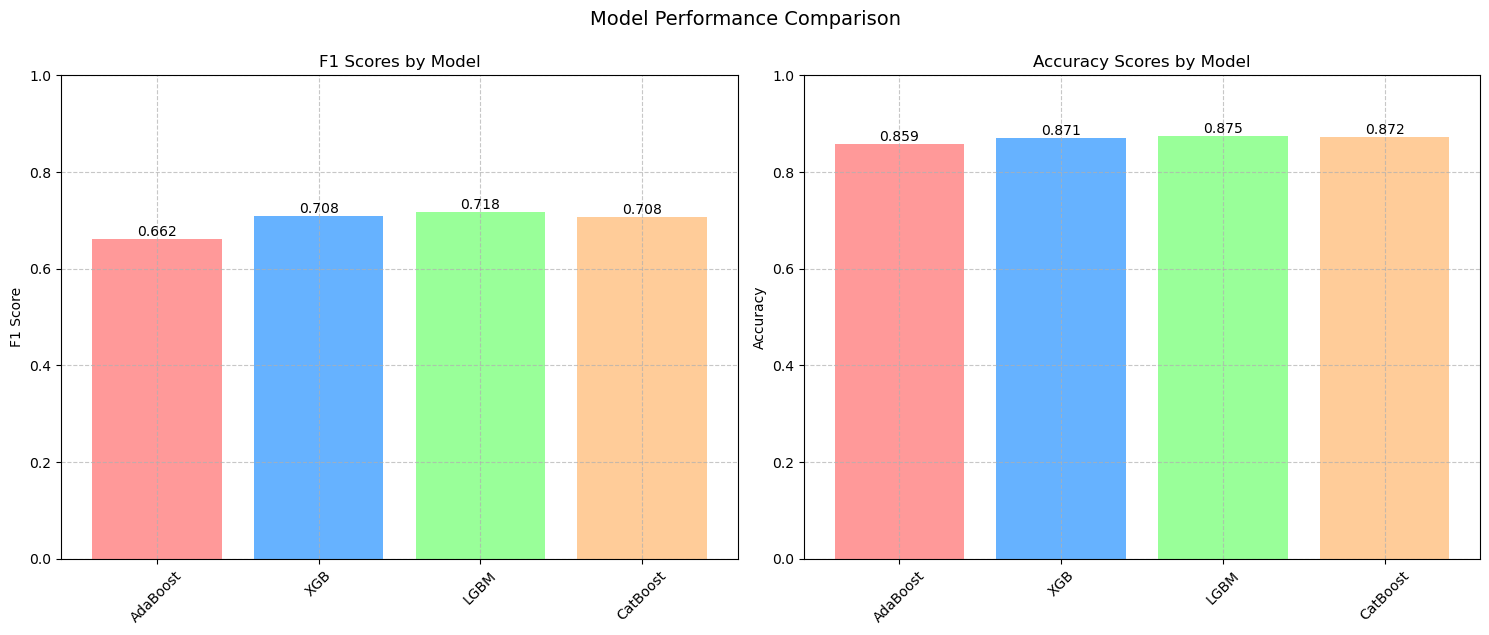

In [10]:
model_names = [name.split(':')[0] for name in names]  # Get just the model names
f1_scores = [float(result.split(':')[1]) for result in f1_list]  # Extract F1 scores
acc_scores = [float(result.split(':')[1]) for result in acc_list]  # Extract accuracy scores

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot F1 Scores
bars1 = ax1.bar(model_names, f1_scores, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
ax1.set_title('F1 Scores by Model')
ax1.set_ylabel('F1 Score')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(0, 1)  # Set y-axis from 0 to 1

# Add value labels on the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Plot Accuracy Scores
bars2 = ax2.bar(model_names, acc_scores, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
ax2.set_title('Accuracy Scores by Model')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_ylim(0, 1)  # Set y-axis from 0 to 1

# Add value labels on the bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a main title
fig.suptitle('Model Performance Comparison', y=1.05, fontsize=14)

# Print numeric results
print("\nF1 Scores:")
for name, score in zip(model_names, f1_scores):
    print(f"{name}: {score:.4f}")

print("\nAccuracy Scores:")
for name, score in zip(model_names, acc_scores):
    print(f"{name}: {score:.4f}")

plt.show()

# Feature Selection 

This section demonstrates various feature selection techniques and evaluates different machine learning models based on selected features. The methods include correlation analysis, univariate selection, and wrapper methods. 

<Axes: >

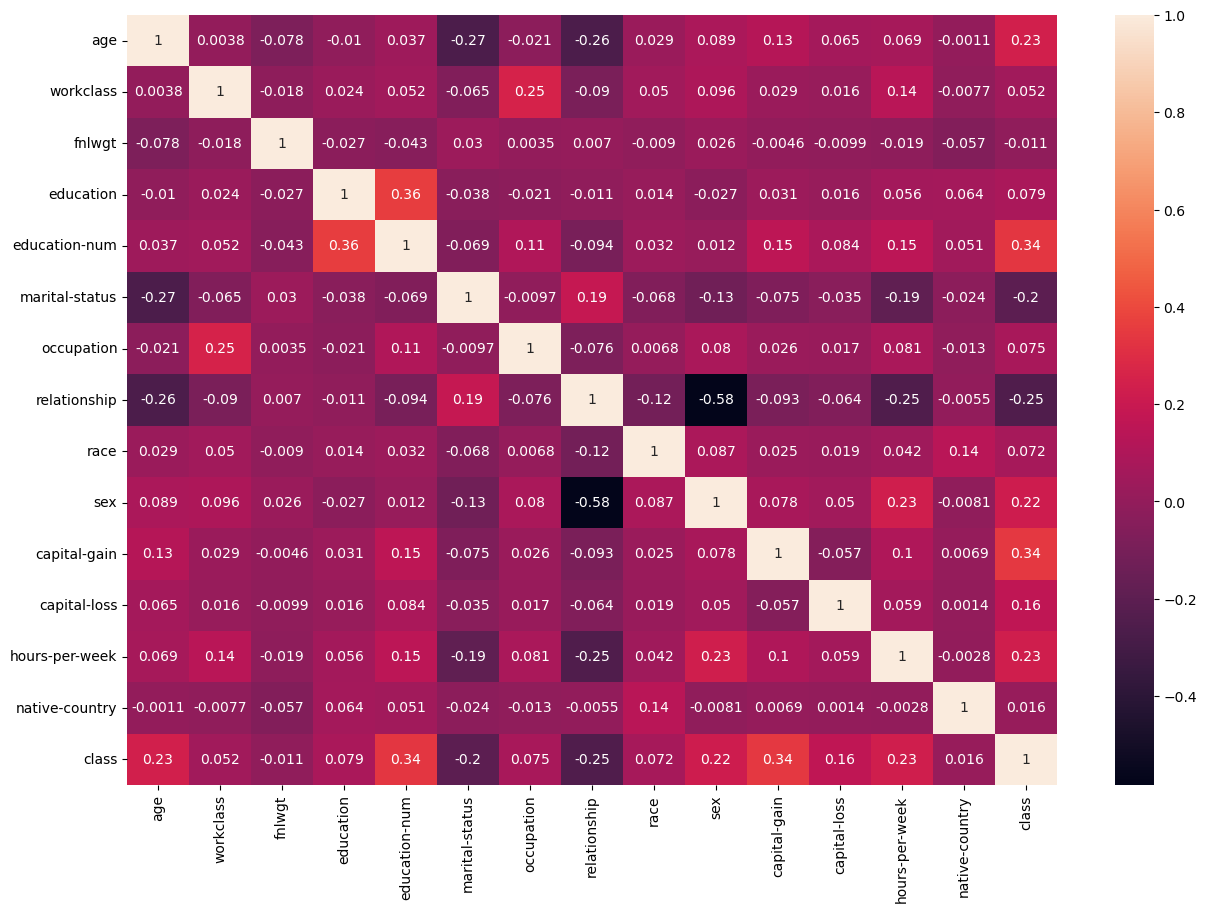

In [11]:
CorrMat = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(CorrMat, annot = True)

## Correlation Threshold

Processing Models (threshold=0) |████████████████████████████████████████| 4/4 [100%] in 1.1s (3.70/s) 
Processing Models (threshold=0.05) |████████████████████████████████████████| 4/4 [100%] in 0.9s (4.65/s) 
Processing Models (threshold=0.1) |████████████████████████████████████████| 4/4 [100%] in 0.7s (5.39/s) 
Processing Models (threshold=0.2) |████████████████████████████████████████| 4/4 [100%] in 0.7s (5.83/s) 
Processing Models (threshold=0.3) |████████████████████████████████████████| 4/4 [100%] in 0.5s (8.00/s) 


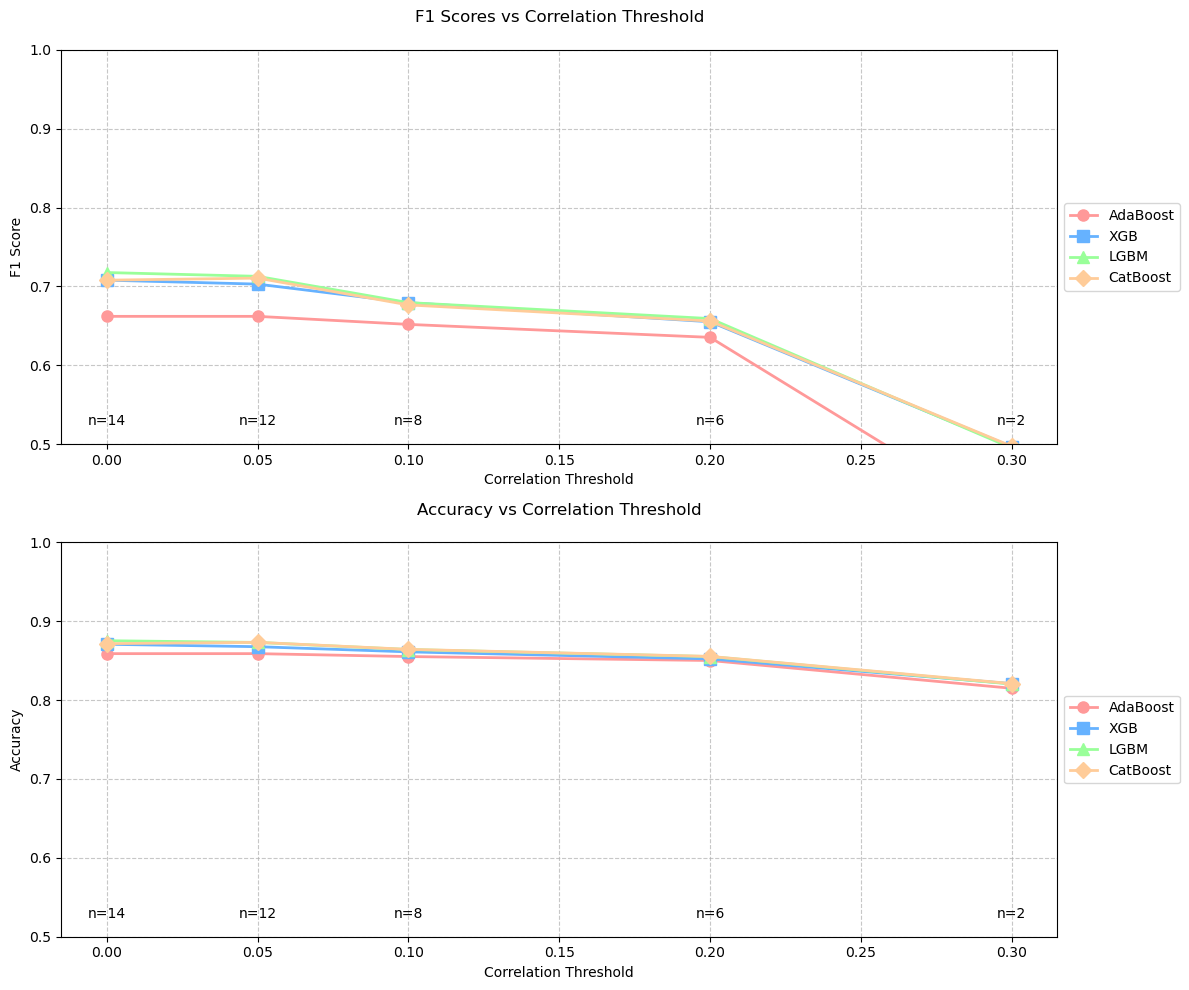


Detailed Results:

Correlation Threshold | Features | Model | F1 Score | Accuracy
------------------------------------------------------------
       0.00         |    14    | AdaBoost |  0.6621  |  0.8588 
       0.00         |    14    |  XGB  |  0.7080  |  0.8707 
       0.00         |    14    | LGBM  |  0.7176  |  0.8752 
       0.00         |    14    | CatBoost |  0.7079  |  0.8715 
       0.05         |    12    | AdaBoost |  0.6621  |  0.8588 
       0.05         |    12    |  XGB  |  0.7030  |  0.8676 
       0.05         |    12    | LGBM  |  0.7128  |  0.8731 
       0.05         |    12    | CatBoost |  0.7106  |  0.8732 
       0.10         |    8     | AdaBoost |  0.6519  |  0.8552 
       0.10         |    8     |  XGB  |  0.6794  |  0.8611 
       0.10         |    8     | LGBM  |  0.6795  |  0.8641 
       0.10         |    8     | CatBoost |  0.6766  |  0.8643 
       0.20         |    6     | AdaBoost |  0.6355  |  0.8501 
       0.20         |    6     |  XGB  |  

In [12]:
# Create lists to store results for each threshold
vals = [0,0.05,0.1,0.2,0.3]
thresholds = vals
corr_models_data = {name: {'f1': [], 'acc': []} for name in model_names}

# Collect data for each threshold
for val in vals:
    features = abs(CorrMat["class"][abs(CorrMat["class"]) > val].drop('class')).index.tolist()
    
    X = df.drop(columns='class')
    X = X[features]
    
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

    with alive_bar(len(models), title=f"Processing Models (threshold={val})") as bar:
        for i, model in enumerate(models):
            f1, acc = scoring_f1(x_train, x_valid, y_train, y_valid, model, names[i])
            model_name = names[i].split(':')[0]
            corr_models_data[model_name]['f1'].append(float(f1.split(':')[1]))
            corr_models_data[model_name]['acc'].append(float(acc.split(':')[1]))
            bar()

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Colors for different models
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
markers = ['o', 's', '^', 'D']

# Plot F1 Scores
for (model_name, data), color, marker in zip(corr_models_data.items(), colors, markers):
    ax1.plot(thresholds, data['f1'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax1.set_title('F1 Scores vs Correlation Threshold', pad=20)
ax1.set_xlabel('Correlation Threshold')
ax1.set_ylabel('F1 Score')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylim(0.5, 1.0)  # Adjust as needed

# Plot Accuracy Scores
for (model_name, data), color, marker in zip(corr_models_data.items(), colors, markers):
    ax2.plot(thresholds, data['acc'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax2.set_title('Accuracy vs Correlation Threshold', pad=20)
ax2.set_xlabel('Correlation Threshold')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylim(0.5, 1.0)  # Adjust as needed

# Add number of features used for each threshold
for i, val in enumerate(vals):
    features = abs(CorrMat["class"][abs(CorrMat["class"]) > val].drop('class')).index.tolist()
    ax1.text(val, 0.52, f'n={len(features)}', ha='center', va='bottom')
    ax2.text(val, 0.52, f'n={len(features)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numeric results in a table format
print("\nDetailed Results:")
print("\nCorrelation Threshold | Features | Model | F1 Score | Accuracy")
print("-" * 60)

for val in vals:
    features = abs(CorrMat["class"][abs(CorrMat["class"]) > val].drop('class')).index.tolist()
    for model_name in corr_models_data.keys():
        f1 = corr_models_data[model_name]['f1'][vals.index(val)]
        acc = corr_models_data[model_name]['acc'][vals.index(val)]
        print(f"{val:^19.2f} | {len(features):^8d} | {model_name:^5} | {f1:^8.4f} | {acc:^8.4f}")

## Univariate Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Processing k=1 |████████████████████████████████████████| 4/4 [100%] in 0.5s (8.21/s) 
Processing k=2 |████████████████████████████████████████| 4/4 [100%] in 0.5s (7.42/s) 
Processing k=3 |████████████████████████████████████████| 4/4 [100%] in 0.6s (6.85/s) 
Processing k=4 |████████████████████████████████████████| 4/4 [100%] in 0.6s (6.28/s) 
Processing k=5 |████████████████████████████████████████| 4/4 [100%] in 0.7s (5.71/s) 
Processing k=6 |████████████████████████████████████████| 4/4 [100%] in 0.7s (5.56/s) 
Processing k=7 |████████████████████████████████████████| 4/4 [100%] in 0.7s (5.37/s) 
Processing k=8 |████████████████████████████████████████| 4/4 [100%] in 0.8s (5.21/s) 
Processing k=9 |████████████████████████████████████████| 4/4 [100%] in 0.8s (4.99/s) 
Processing k=10 |████████████████████████████████████████| 4/4 [100%] in 0.9s (4.59/s) 
Processing k=11 |████████████████████████████████████████| 4/4 [100%] in 0.9s (4.57/s) 
Processing k=12 |████████████████████████

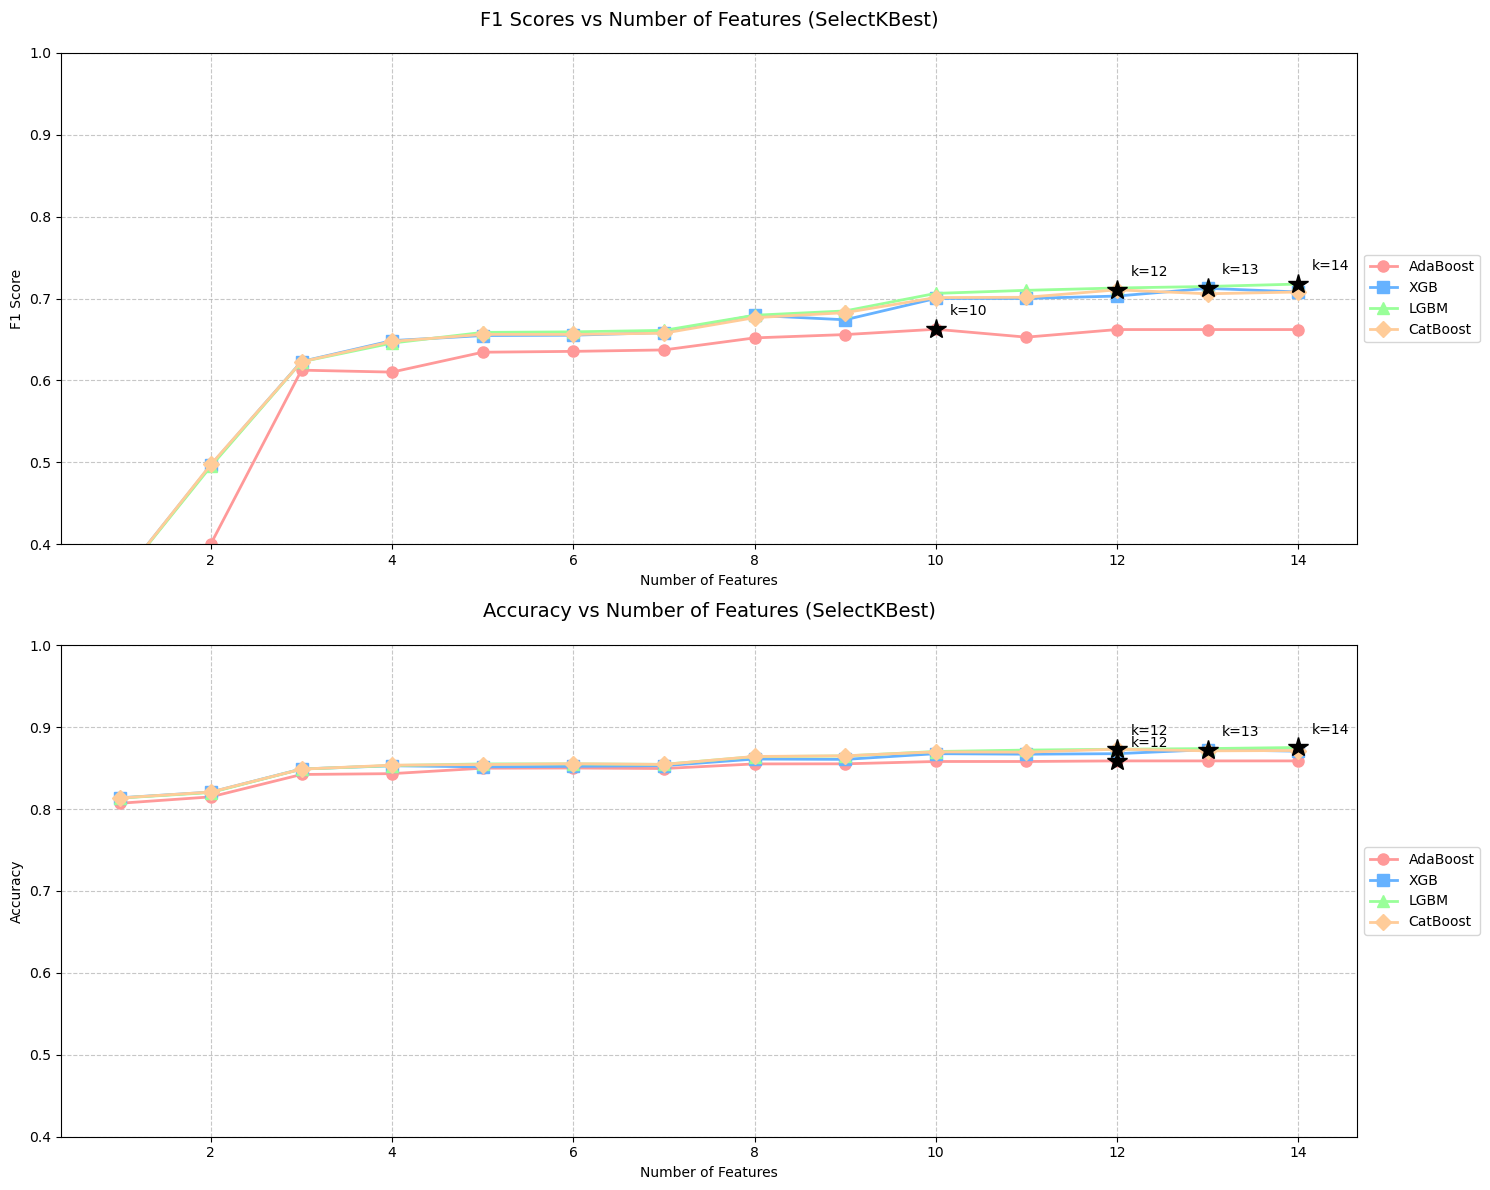


Best Results Summary:

Model | Best F1 Score (k) | Best Accuracy (k)
---------------------------------------------

AdaBoost | 0.6624 (k=10) | 0.8588 (k=12)
Top features for best F1 score:
['age', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

 XGB   | 0.7124 (k=13) | 0.8726 (k=13)
Top features for best F1 score:
['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

 LGBM  | 0.7176 (k=14) | 0.8752 (k=14)
Top features for best F1 score:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

CatBoost | 0.7106 (k=12) | 0.8732 (k=12)
Top features for best F1 score:
['age', 'workclass', 'education', 'education-num', 'marital-status', 'occup

In [14]:
# Initialize dictionaries to store results
uni_models_data = {name.split(':')[0]: {'f1': [], 'acc': [], 'features': []} for name in names}
feature_counts = range(1, x.shape[1] + 1)

# Collect data
for ii in range(x.shape[1]):    
    chi2_selector = SelectKBest(f_classif, k=ii+1)
    kBest = chi2_selector.fit_transform(x, y)
    x_train, x_valid, y_train, y_valid = train_test_split(kBest, y, test_size=0.3, random_state=42)
    
    selectedFeatureIndices = chi2_selector.get_support(indices=True)
    selectedFeatureColNames = x.columns[selectedFeatureIndices]

    with alive_bar(len(models), title=f"Processing k={ii+1}") as bar:
        for i, model in enumerate(models):
            f1, acc = scoring_f1(x_train, x_valid, y_train, y_valid, model, names[i])
            model_name = names[i].split(':')[0]
            uni_models_data[model_name]['f1'].append(float(f1.split(':')[1]))
            uni_models_data[model_name]['acc'].append(float(acc.split(':')[1]))
            uni_models_data[model_name]['features'].append(list(selectedFeatureColNames))
            bar()

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colors and markers for different models
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
markers = ['o', 's', '^', 'D']

# Plot F1 Scores
for (model_name, data), color, marker in zip(uni_models_data.items(), colors, markers):
    ax1.plot(feature_counts, data['f1'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax1.set_title('F1 Scores vs Number of Features (SelectKBest)', pad=20, fontsize=14)
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('F1 Score')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylim(0.4, 1.0)  # Adjust as needed

# Plot Accuracy Scores
for (model_name, data), color, marker in zip(uni_models_data.items(), colors, markers):
    ax2.plot(feature_counts, data['acc'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax2.set_title('Accuracy vs Number of Features (SelectKBest)', pad=20, fontsize=14)
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylim(0.4, 1.0)  # Adjust as needed

# Find best performing points
for model_name, data in uni_models_data.items():
    # Best F1 score
    best_f1_idx = np.argmax(data['f1'])
    ax1.plot(feature_counts[best_f1_idx], data['f1'][best_f1_idx], 'k*', markersize=15)
    ax1.annotate(f'k={feature_counts[best_f1_idx]}',
                 xy=(feature_counts[best_f1_idx], data['f1'][best_f1_idx]),
                 xytext=(10, 10), textcoords='offset points')
    
    # Best accuracy
    best_acc_idx = np.argmax(data['acc'])
    ax2.plot(feature_counts[best_acc_idx], data['acc'][best_acc_idx], 'k*', markersize=15)
    ax2.annotate(f'k={feature_counts[best_acc_idx]}',
                 xy=(feature_counts[best_acc_idx], data['acc'][best_acc_idx]),
                 xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary of best results
print("\nBest Results Summary:")
print("\nModel | Best F1 Score (k) | Best Accuracy (k)")
print("-" * 45)

for model_name, data in uni_models_data.items():
    best_f1_idx = np.argmax(data['f1'])
    best_acc_idx = np.argmax(data['acc'])
    print(f"\n{model_name:^6} | {data['f1'][best_f1_idx]:.4f} (k={best_f1_idx+1}) | {data['acc'][best_acc_idx]:.4f} (k={best_acc_idx+1})")
    
    print("Top features for best F1 score:")
    print(data['features'][best_f1_idx])

## Wrapper Method

RFE Feature Selection |████████████████████████████████████████| 56/56 [100%] in 1:18.4 (0.71/s) 


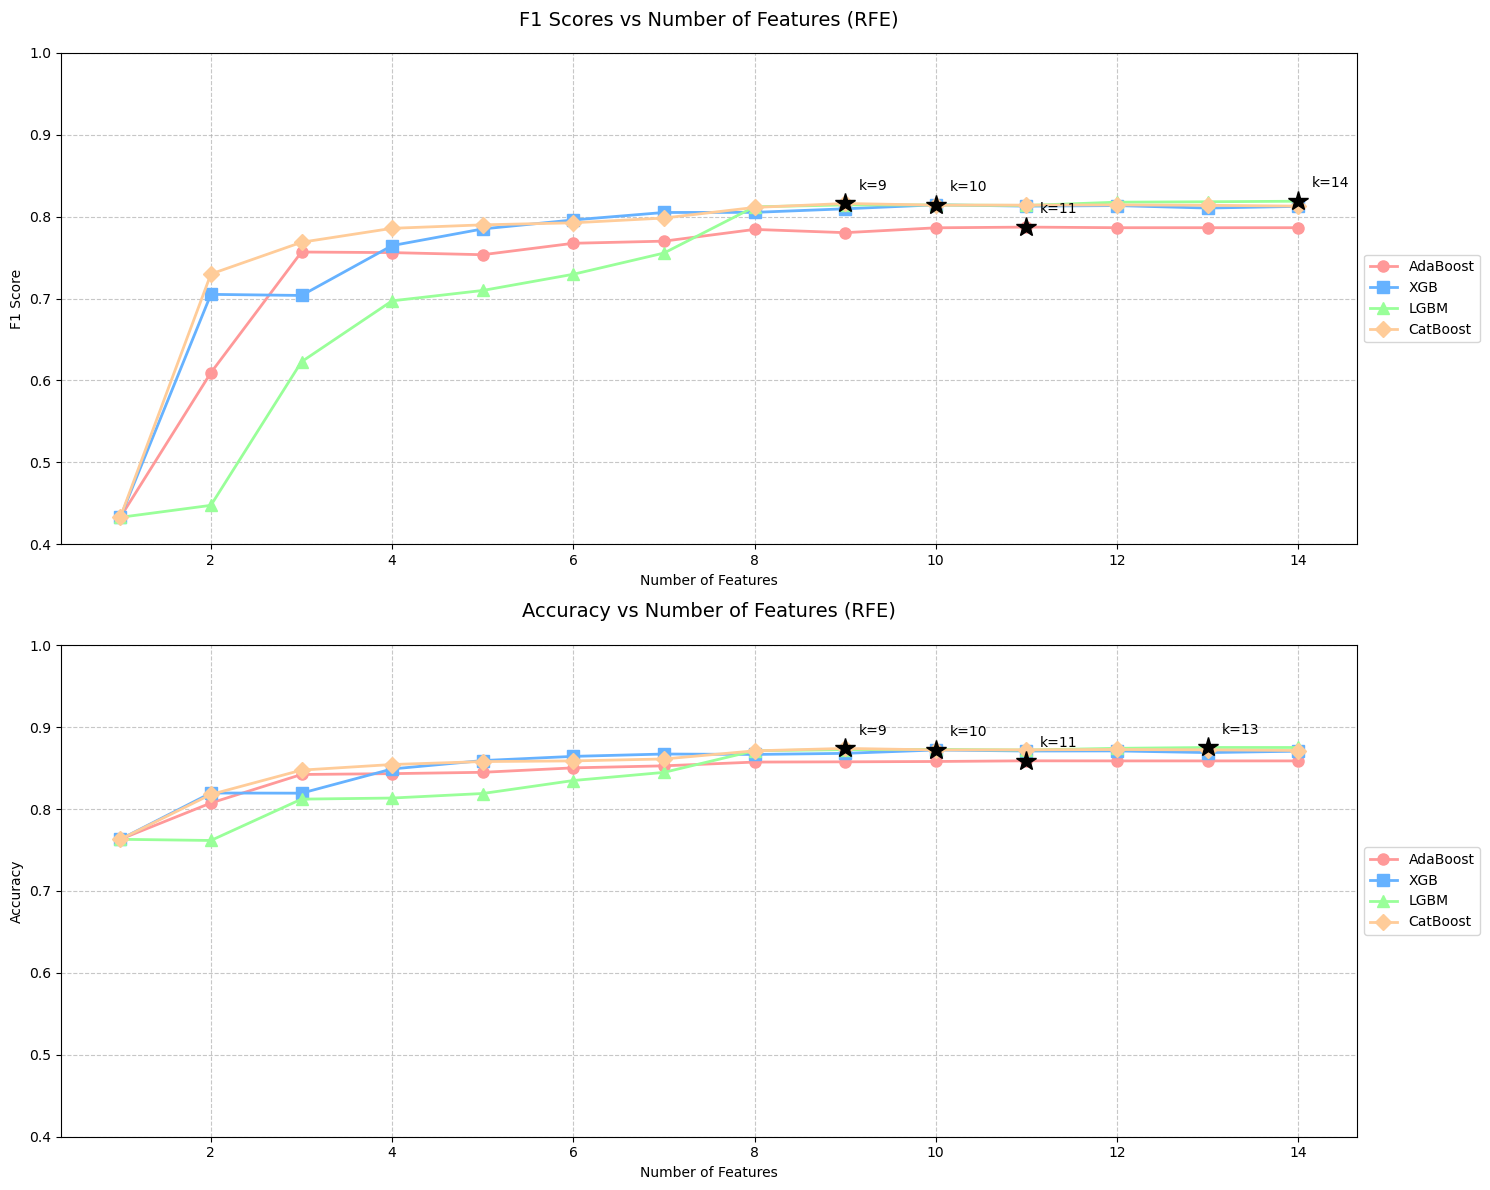


Best Results Summary:

Model | Best F1 Score (k) | Best Accuracy (k)
---------------------------------------------

AdaBoost | 0.7872 (k=11) | 0.8589 (k=11)
Features: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']


 XGB   | 0.8144 (k=10) | 0.8721 (k=10)
Features: ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']


 LGBM  | 0.8188 (k=14) | 0.8752 (k=13)
Features: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


CatBoost | 0.8160 (k=9) | 0.8741 (k=9)
Features: ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week']



In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

# 定義進度條的總步數（模型數量 x 特徵數）
total_steps = len(models) * 14

# Initialize dictionaries to store results
wrap_models_data = {name.split(':')[0]: {'f1': [], 'acc': [], 'features': []} for name in names}
feature_counts = range(1, 15)  # 1 to 14 features

# Collect data
with alive_bar(total_steps, title="RFE Feature Selection") as bar:
    for k in range(1, 15):
        for i, model in enumerate(models):
            rfe = RFE(estimator=model, n_features_to_select=k, step=1)
            rfe.fit(X_train, y_train)
            
            preds = rfe.predict(X_valid)
            f1score = f1_score(y_valid, preds, average='macro')
            accuracy = accuracy_score(y_valid, preds)
            
            model_name = names[i].split(':')[0]
            wrap_models_data[model_name]['f1'].append(f1score)
            wrap_models_data[model_name]['acc'].append(accuracy)
            wrap_models_data[model_name]['features'].append(list(X_train.columns[rfe.support_]))
            
            bar()

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colors and markers for different models
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
markers = ['o', 's', '^', 'D']

# Plot F1 Scores
for (model_name, data), color, marker in zip(wrap_models_data.items(), colors, markers):
    ax1.plot(feature_counts, data['f1'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax1.set_title('F1 Scores vs Number of Features (RFE)', pad=20, fontsize=14)
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('F1 Score')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylim(0.4, 1.0)  # Adjust as needed

# Plot Accuracy Scores
for (model_name, data), color, marker in zip(wrap_models_data.items(), colors, markers):
    ax2.plot(feature_counts, data['acc'], marker=marker, label=model_name, 
             color=color, linewidth=2, markersize=8)

ax2.set_title('Accuracy vs Number of Features (RFE)', pad=20, fontsize=14)
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylim(0.4, 1.0)  # Adjust as needed

# Find and mark best performing points
for model_name, data in wrap_models_data.items():
    # Best F1 score
    best_f1_idx = np.argmax(data['f1'])
    ax1.plot(feature_counts[best_f1_idx], data['f1'][best_f1_idx], 'k*', markersize=15)
    ax1.annotate(f'k={feature_counts[best_f1_idx]}',
                 xy=(feature_counts[best_f1_idx], data['f1'][best_f1_idx]),
                 xytext=(10, 10), textcoords='offset points')
    
    # Best accuracy
    best_acc_idx = np.argmax(data['acc'])
    ax2.plot(feature_counts[best_acc_idx], data['acc'][best_acc_idx], 'k*', markersize=15)
    ax2.annotate(f'k={feature_counts[best_acc_idx]}',
                 xy=(feature_counts[best_acc_idx], data['acc'][best_acc_idx]),
                 xytext=(10, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print summary of best results
print("\nBest Results Summary:")
print("\nModel | Best F1 Score (k) | Best Accuracy (k)")
print("-" * 45)

for model_name, data in wrap_models_data.items():
    best_f1_idx = np.argmax(data['f1'])
    best_acc_idx = np.argmax(data['acc'])
    print(f"\n{model_name:^6} | {data['f1'][best_f1_idx]:.4f} (k={best_f1_idx+1}) | {data['acc'][best_acc_idx]:.4f} (k={best_acc_idx+1})")
    print(f"Features: {data['features'][best_f1_idx]}\n")

In [16]:
# Get maximum scores for each model in each method
model_max_results = {}

for model in model_names:
    idx = model_names.index(model)
    model_max_results[model] = {
        'Wrapper': {
            'F1': max(wrap_models_data[model]['f1']),
            'Accuracy': max(wrap_models_data[model]['acc'])
        },
        'Univariate': {
            'F1': max(uni_models_data[model]['f1']),
            'Accuracy': max(uni_models_data[model]['acc'])
        },
        'Correlation': {
            'F1': max(corr_models_data[model]['f1']),
            'Accuracy': max(corr_models_data[model]['acc'])
        }
    }
model_max_results

{'AdaBoost': {'Wrapper': {'F1': 0.7871685366512595,
   'Accuracy': 0.858941549800389},
  'Univariate': {'F1': 0.662445202143205, 'Accuracy': 0.8588391851776026},
  'Correlation': {'F1': 0.6620926243567753, 'Accuracy': 0.8588391851776026}},
 'XGB': {'Wrapper': {'F1': 0.8143721105372406, 'Accuracy': 0.8721465861398301},
  'Univariate': {'F1': 0.7124047124047124, 'Accuracy': 0.8725560446309756},
  'Correlation': {'F1': 0.7079768786127167, 'Accuracy': 0.870713481420821}},
 'LGBM': {'Wrapper': {'F1': 0.8187706300518055,
   'Accuracy': 0.8752175248234211},
  'Univariate': {'F1': 0.7176279823951819, 'Accuracy': 0.8752175248234211},
  'Correlation': {'F1': 0.7176279823951819, 'Accuracy': 0.8752175248234211}},
 'CatBoost': {'Wrapper': {'F1': 0.8160016868736242,
   'Accuracy': 0.874091513972771},
  'Univariate': {'F1': 0.7105816398037842, 'Accuracy': 0.8731702323676938},
  'Correlation': {'F1': 0.7105816398037842, 'Accuracy': 0.8731702323676938}}}

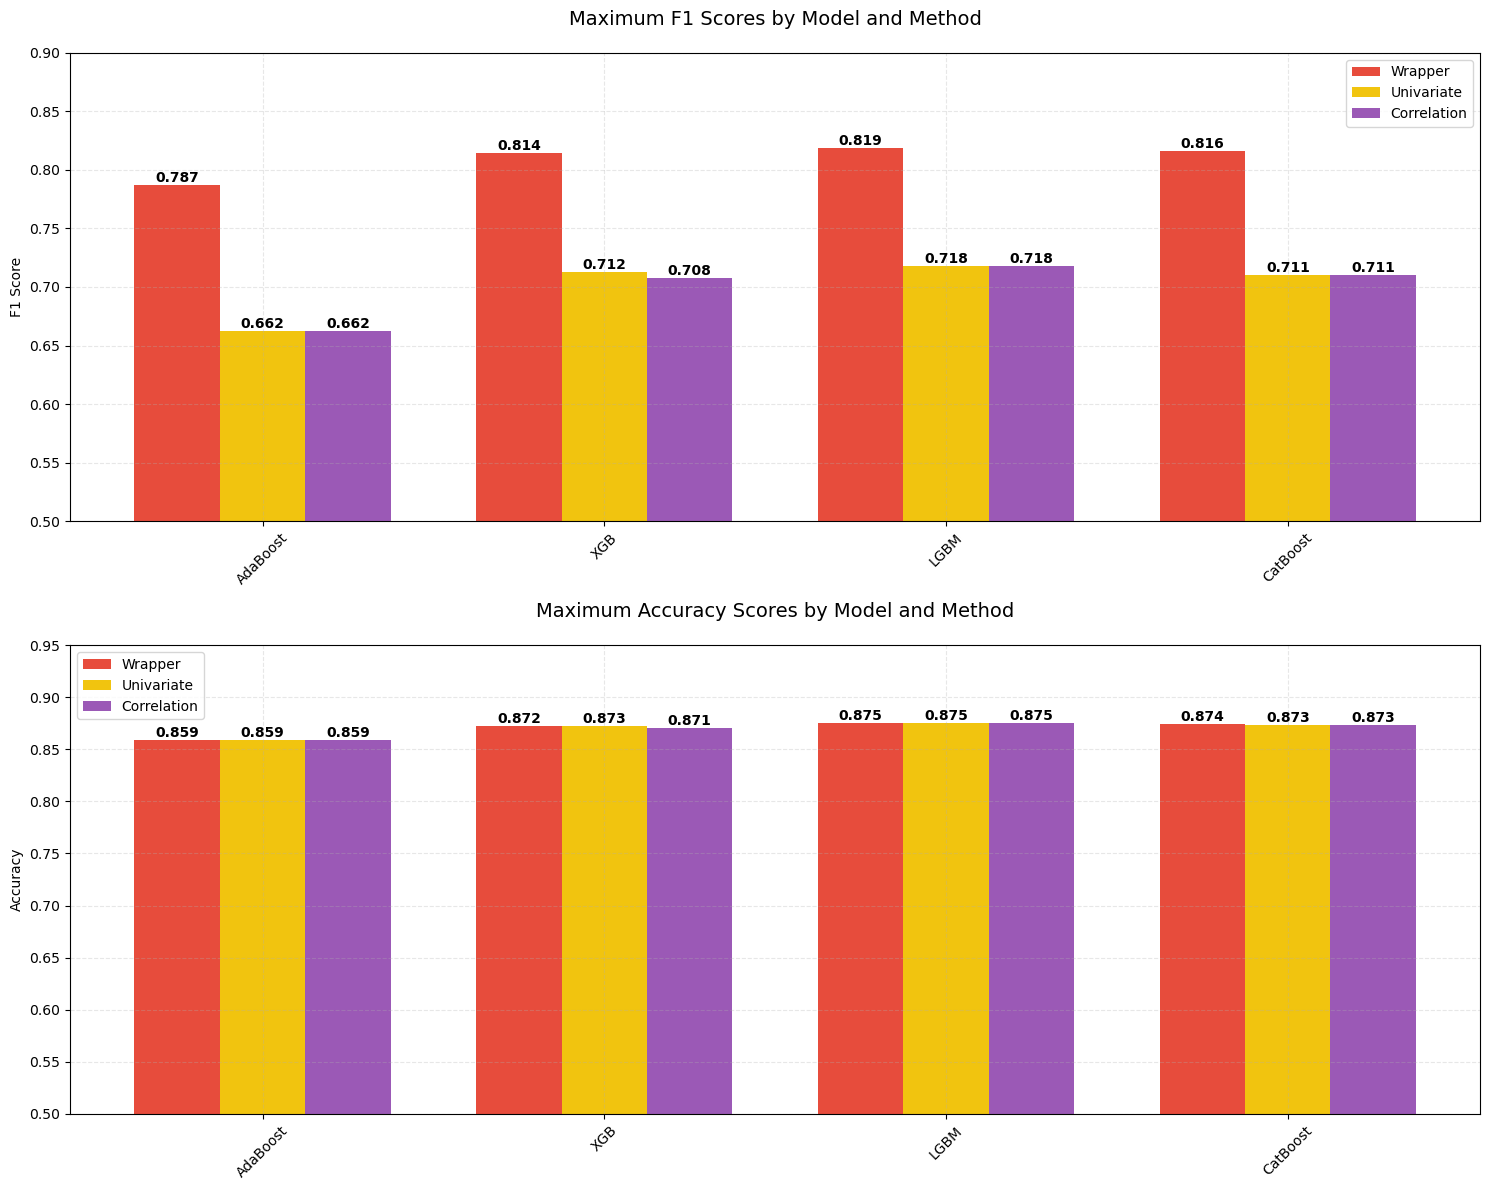

In [17]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Set width of bars and positions
barWidth = 0.25
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Colors for different methods
colors = ['#e74c3c', '#f1c40f', '#9b59b6']  # Red, Yellow, Purple
methods = ['Wrapper', 'Univariate', 'Correlation']

# Plot F1 Scores
f1_scores = {method: [model_max_results[model][method]['F1'] for model in model_names] 
             for method in methods}

bars1 = ax1.bar(r1, f1_scores['Wrapper'], width=barWidth, color=colors[0], label='Wrapper')
bars2 = ax1.bar(r2, f1_scores['Univariate'], width=barWidth, color=colors[1], label='Univariate')
bars3 = ax1.bar(r3, f1_scores['Correlation'], width=barWidth, color=colors[2], label='Correlation')

# Add value labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars3:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Maximum F1 Scores by Model and Method', pad=20, fontsize=14)
ax1.set_ylabel('F1 Score')
ax1.set_xticks([r + barWidth for r in range(len(model_names))])
ax1.set_xticklabels(model_names, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()

# Plot Accuracy Scores
acc_scores = {method: [model_max_results[model][method]['Accuracy'] for model in model_names] 
              for method in methods}

bars4 = ax2.bar(r1, acc_scores['Wrapper'], width=barWidth, color=colors[0], label='Wrapper')
bars5 = ax2.bar(r2, acc_scores['Univariate'], width=barWidth, color=colors[1], label='Univariate')
bars6 = ax2.bar(r3, acc_scores['Correlation'], width=barWidth, color=colors[2], label='Correlation')

# Add value labels on top of the bars
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars5:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars6:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Maximum Accuracy Scores by Model and Method', pad=20, fontsize=14)
ax2.set_ylabel('Accuracy')
ax2.set_xticks([r + barWidth for r in range(len(model_names))])
ax2.set_xticklabels(model_names, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()

# Adjust y-axis limits to make room for labels
ax1.set_ylim(0.5, 0.9)  # Adjusted upper limit
ax2.set_ylim(0.5, 0.95)  # Adjusted upper limit

# Add more space between subplots
plt.subplots_adjust(hspace=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Create detailed summary table
summary_data = []
for model in model_names:
    model_data = {
        'Model': model,
        'Wrapper F1': model_max_results[model]['Wrapper']['F1'],
        'Univariate F1': model_max_results[model]['Univariate']['F1'],
        'Correlation F1': model_max_results[model]['Correlation']['F1'],
        'Best F1 Method': max(methods, key=lambda x: model_max_results[model][x]['F1']),
        'Best F1 Score': max(model_max_results[model][x]['F1'] for x in methods),
        'Wrapper Acc': model_max_results[model]['Wrapper']['Accuracy'],
        'Univariate Acc': model_max_results[model]['Univariate']['Accuracy'],
        'Correlation Acc': model_max_results[model]['Correlation']['Accuracy'],
        'Best Acc Method': max(methods, key=lambda x: model_max_results[model][x]['Accuracy']),
        'Best Acc Score': max(model_max_results[model][x]['Accuracy'] for x in methods)
    }
    summary_data.append(model_data)

df_summary = pd.DataFrame(summary_data)

# Print summary table
print("\nDetailed Performance Summary:")
print(df_summary.to_string(index=False))

# Print best method for each model
print("\nBest Method for Each Model:")
for model in model_names:
    print(f"\n{model}:")
    best_f1_method = max(methods, key=lambda x: model_max_results[model][x]['F1'])
    best_acc_method = max(methods, key=lambda x: model_max_results[model][x]['Accuracy'])
    print(f"Best F1: {best_f1_method} ({model_max_results[model][best_f1_method]['F1']:.4f})")
    print(f"Best Accuracy: {best_acc_method} ({model_max_results[model][best_acc_method]['Accuracy']:.4f})")

# Find overall best combination
best_f1_model = max(model_names, 
                   key=lambda m: max(model_max_results[m][method]['F1'] for method in methods))
best_acc_model = max(model_names, 
                    key=lambda m: max(model_max_results[m][method]['Accuracy'] for method in methods))

print("\nOverall Best Combinations:")
print(f"Best F1: {best_f1_model} with {max(methods, key=lambda x: model_max_results[best_f1_model][x]['F1'])} "
      f"({max(model_max_results[best_f1_model][x]['F1'] for x in methods):.4f})")
print(f"Best Accuracy: {best_acc_model} with {max(methods, key=lambda x: model_max_results[best_acc_model][x]['Accuracy'])} "
      f"({max(model_max_results[best_acc_model][x]['Accuracy'] for x in methods):.4f})")


Detailed Performance Summary:
   Model  Wrapper F1  Univariate F1  Correlation F1 Best F1 Method  Best F1 Score  Wrapper Acc  Univariate Acc  Correlation Acc Best Acc Method  Best Acc Score
AdaBoost    0.787169       0.662445        0.662093        Wrapper       0.787169     0.858942        0.858839         0.858839         Wrapper        0.858942
     XGB    0.814372       0.712405        0.707977        Wrapper       0.814372     0.872147        0.872556         0.870713      Univariate        0.872556
    LGBM    0.818771       0.717628        0.717628        Wrapper       0.818771     0.875218        0.875218         0.875218         Wrapper        0.875218
CatBoost    0.816002       0.710582        0.710582        Wrapper       0.816002     0.874092        0.873170         0.873170         Wrapper        0.874092

Best Method for Each Model:

AdaBoost:
Best F1: Wrapper (0.7872)
Best Accuracy: Wrapper (0.8589)

XGB:
Best F1: Wrapper (0.8144)
Best Accuracy: Univariate (0.8726)

LGB

# Handling Imbalanced Data

In this section, we address the challenge of imbalanced datasets. This often occurs when one class significantly outnumbers the other(s), which can lead to biased models. We will demonstrate some common techniques to handle imbalanced data, such as:

- Oversampling
- Using algorithms designed for imbalanced data
- Applying class weights in model training
- Synthetic data generation techniques like SMOTE

In [19]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

In [20]:
# 1. SMOTE Oversampling
print("Original class distribution:", Counter(y))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)
print("Class distribution after SMOTE:", Counter(y_smote))

# 2. Class Weights for Models
# Update model definitions with class weights
models_weighted = [
    AdaBoostClassifier(n_estimators=100, algorithm='SAMME'),
    xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=len(y[y==0])/len(y[y==1])),
    lgb.LGBMClassifier(n_estimators=100, verbose=-1, class_weight='balanced'),
    cat.CatBoostClassifier(n_estimators=100, verbose=0, class_weights={0:1, 1:len(y[y==0])/len(y[y==1])})
]

# Create pipeline with both SMOTE
sampling_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
])


Original class distribution: Counter({0: 24720, 1: 7841})
Class distribution after SMOTE: Counter({0: 24720, 1: 24720})


In [21]:
X_balanced, y_balanced = sampling_pipeline.fit_resample(x, y)
print("Class distribution after sampling:", Counter(y_balanced))

# Evaluate models with balanced data
x_train, x_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

balance_f1_list = []
balance_acc_list = []

with alive_bar(len(models_weighted), title="Processing Balanced Models") as bar:
    for i in range(len(models_weighted)):
        f1, acc = scoring_f1(x_train, x_valid, y_train, y_valid, models_weighted[i], names[i])
        balance_f1_list.append(f1)
        balance_acc_list.append(acc)
        bar()

print("\nResults with balanced data:")
print("F1 Scores:")
for result in balance_f1_list:
    print(result)
print("\nAccuracy Scores:")
for result in balance_acc_list:
    print(result)

Class distribution after sampling: Counter({0: 24720, 1: 24720})
Processing Balanced Models |████████████████████████████████████████| 4/4 [100%] in 1.7s (2.35/s) 

Results with balanced data:
F1 Scores:
AdaBoost:0.851472134595163
XGB:0.8819852481560195
LGBM:0.8955163319131669
CatBoost:0.8718795888399412

Accuracy Scores:
AdaBoost:0.8476267529665588
XGB:0.8727076591154261
LGBM:0.8958333333333334
CatBoost:0.8588187702265372



Performance Summary:
   Model F1 Score Accuracy
AdaBoost   0.8515   0.8476
     XGB   0.8820   0.8727
    LGBM   0.8955   0.8958
CatBoost   0.8719   0.8588

Best Performing Models:
Best F1 Score: LGBM (0.8955)
Best Accuracy: LGBM (0.8958)


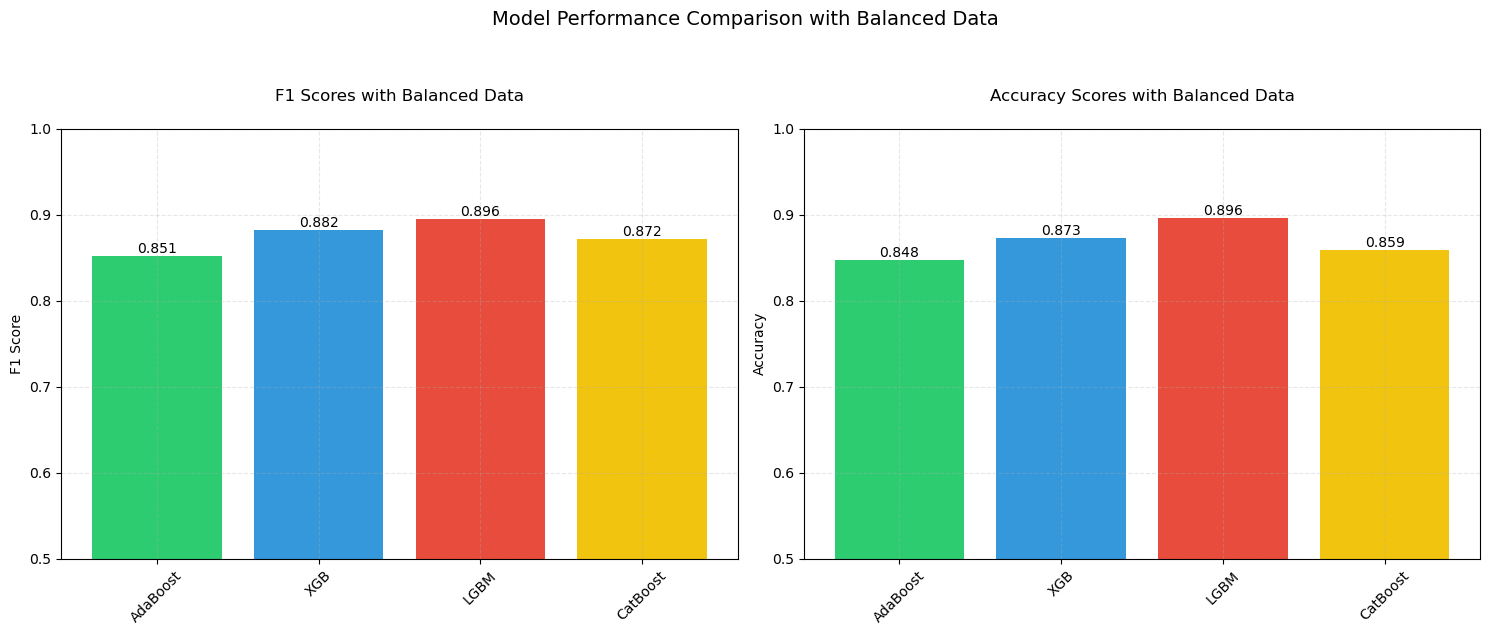

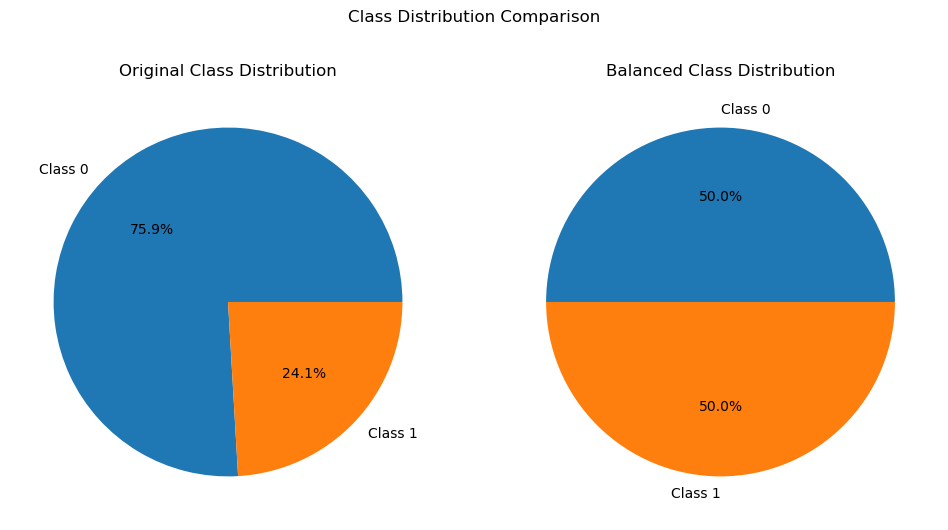

In [22]:
# Extract model names and scores
model_names = [name.split(':')[0] for name in names]
f1_scores = [float(f1.split(':')[1]) for f1 in balance_f1_list]
acc_scores = [float(acc.split(':')[1]) for acc in balance_acc_list]

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Colors for bars
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']

# Plot F1 Scores
bars1 = ax1.bar(model_names, f1_scores, color=colors)
ax1.set_title('F1 Scores with Balanced Data', pad=20)
ax1.set_ylabel('F1 Score')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(0.5, 1.0)  # Adjust as needed

# Add value labels on the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Plot Accuracy Scores
bars2 = ax2.bar(model_names, acc_scores, color=colors)
ax2.set_title('Accuracy Scores with Balanced Data', pad=20)
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_ylim(0.5, 1.0)  # Adjust as needed

# Add value labels on the bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Add a main title
fig.suptitle('Model Performance Comparison with Balanced Data', y=1.05, fontsize=14)

# Adjust layout
plt.tight_layout()

# Add performance comparison table
table_data = {
    'Model': model_names,
    'F1 Score': [f'{score:.4f}' for score in f1_scores],
    'Accuracy': [f'{score:.4f}' for score in acc_scores]
}
df_results = pd.DataFrame(table_data)

# Print summary table
print("\nPerformance Summary:")
print(df_results.to_string(index=False))

# Add best model indicators
best_f1_idx = np.argmax(f1_scores)
best_acc_idx = np.argmax(acc_scores)

print("\nBest Performing Models:")
print(f"Best F1 Score: {model_names[best_f1_idx]} ({f1_scores[best_f1_idx]:.4f})")
print(f"Best Accuracy: {model_names[best_acc_idx]} ({acc_scores[best_acc_idx]:.4f})")

# Optional: Add a horizontal line showing the baseline performance
if 'baseline_f1' in locals():
    ax1.axhline(y=baseline_f1, color='r', linestyle='--', alpha=0.5, label='Baseline')
    ax1.legend()
if 'baseline_acc' in locals():
    ax2.axhline(y=baseline_acc, color='r', linestyle='--', alpha=0.5, label='Baseline')
    ax2.legend()

plt.show()

# Optional: Add distribution comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Class Distribution')
plt.pie([Counter(y)[0], Counter(y)[1]], labels=['Class 0', 'Class 1'], autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Balanced Class Distribution')
plt.pie([Counter(y_balanced)[0], Counter(y_balanced)[1]], labels=['Class 0', 'Class 1'], autopct='%1.1f%%')

plt.suptitle('Class Distribution Comparison', y=1.05)
plt.tight_layout()
plt.show()

## Compare Origin & Sampling Result

In [26]:
# Collect original and oversampling results
results_data = {
    'Original': {
        'F1': [float(f1.split(':')[1]) for f1 in f1_list],
        'Accuracy': [float(acc.split(':')[1]) for acc in acc_list]
    },
    'Oversampling': {
        'F1': [float(f1.split(':')[1]) for f1 in balance_f1_list],
        'Accuracy': [float(acc.split(':')[1]) for acc in balance_acc_list]
    }
}
results_data

{'Original': {'F1': [0.6620926243567753,
   0.7079768786127167,
   0.7176279823951819,
   0.7079357691412613],
  'Accuracy': [0.8588391851776026,
   0.870713481420821,
   0.8752175248234211,
   0.8715323984031119]},
 'Oversampling': {'F1': [0.851472134595163,
   0.8819852481560195,
   0.8955163319131669,
   0.8718795888399412],
  'Accuracy': [0.8476267529665588,
   0.8727076591154261,
   0.8958333333333334,
   0.8588187702265372]}}

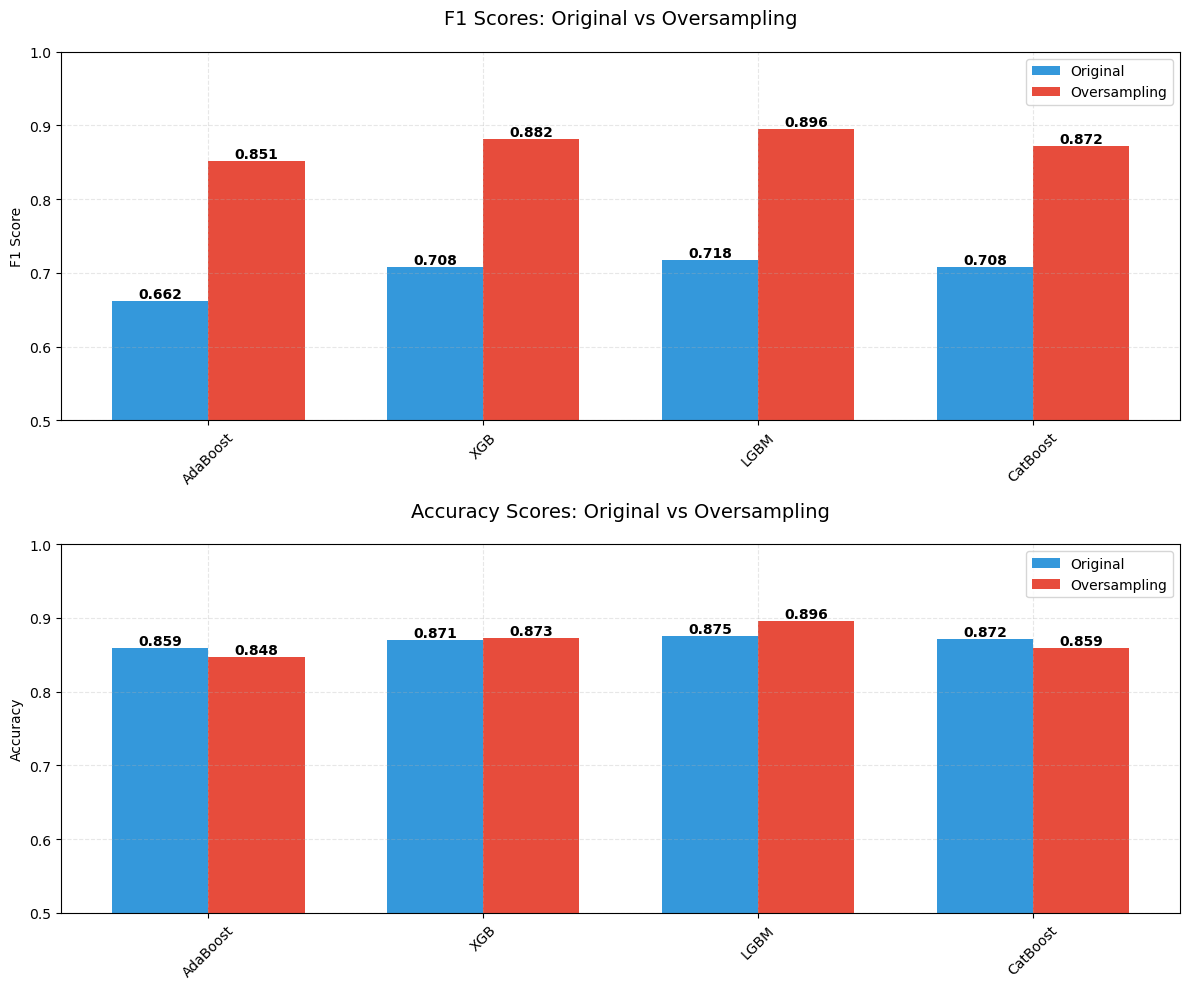

In [27]:
from scipy import stats

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Set width of bars and positions
barWidth = 0.35
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]

# Colors
colors = ['#3498db', '#e74c3c']  # Blue for original, Red for oversampling

# Plot F1 Scores
bars1 = ax1.bar(r1, results_data['Original']['F1'], width=barWidth, 
                color=colors[0], label='Original')
bars2 = ax1.bar(r2, results_data['Oversampling']['F1'], width=barWidth, 
                color=colors[1], label='Oversampling')

# Add value labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')


ax1.set_title('F1 Scores: Original vs Oversampling', pad=20, fontsize=14)
ax1.set_ylabel('F1 Score')
ax1.set_xticks([r + barWidth/2 for r in range(len(model_names))])
ax1.set_xticklabels(model_names, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()
ax1.set_ylim(0.5, 1)

# Plot Accuracy Scores
bars3 = ax2.bar(r1, results_data['Original']['Accuracy'], width=barWidth, 
                color=colors[0], label='Original')
bars4 = ax2.bar(r2, results_data['Oversampling']['Accuracy'], width=barWidth, 
                color=colors[1], label='Oversampling')

# Add value labels on top of the bars
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Accuracy Scores: Original vs Oversampling', pad=20, fontsize=14)
ax2.set_ylabel('Accuracy')
ax2.set_xticks([r + barWidth/2 for r in range(len(model_names))])
ax2.set_xticklabels(model_names, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()
ax2.set_ylim(0.5, 1)


plt.tight_layout()
plt.show()

In [28]:
# Create summary table
summary_data = []
for model in model_names:
    idx = model_names.index(model)
    model_data = {
        'Model': model,
        'Original F1': results_data['Original']['F1'][idx],
        'Oversampling F1': results_data['Oversampling']['F1'][idx],
        'F1 Improvement': results_data['Oversampling']['F1'][idx] - results_data['Original']['F1'][idx],
        'Original Acc': results_data['Original']['Accuracy'][idx],
        'Oversampling Acc': results_data['Oversampling']['Accuracy'][idx],
        'Acc Improvement': results_data['Oversampling']['Accuracy'][idx] - results_data['Original']['Accuracy'][idx]
    }
    summary_data.append(model_data)

df_summary = pd.DataFrame(summary_data)

# Print summary table
print("\nPerformance Comparison Summary:")
print(df_summary.to_string(index=False))

# Statistical comparison
print("\nStatistical Analysis:")
for metric in ['F1', 'Accuracy']:
    t_stat, p_val = stats.ttest_rel(
        results_data['Original'][metric],
        results_data['Oversampling'][metric]
    )
    print(f"\n{metric} Score Comparison:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Mean {metric} Improvement: {np.mean(results_data['Oversampling'][metric]) - np.mean(results_data['Original'][metric]):.4f}")


Performance Comparison Summary:
   Model  Original F1  Oversampling F1  F1 Improvement  Original Acc  Oversampling Acc  Acc Improvement
AdaBoost     0.662093         0.851472        0.189380      0.858839          0.847627        -0.011212
     XGB     0.707977         0.881985        0.174008      0.870713          0.872708         0.001994
    LGBM     0.717628         0.895516        0.177888      0.875218          0.895833         0.020616
CatBoost     0.707936         0.871880        0.163944      0.871532          0.858819        -0.012714

Statistical Analysis:

F1 Score Comparison:
t-statistic: -33.5427
p-value: 0.0001
Mean F1 Improvement: 0.1763

Accuracy Score Comparison:
t-statistic: 0.0426
p-value: 0.9687
Mean Accuracy Improvement: -0.0003


# Compare Origin, Sampling, and Best fearture selection method

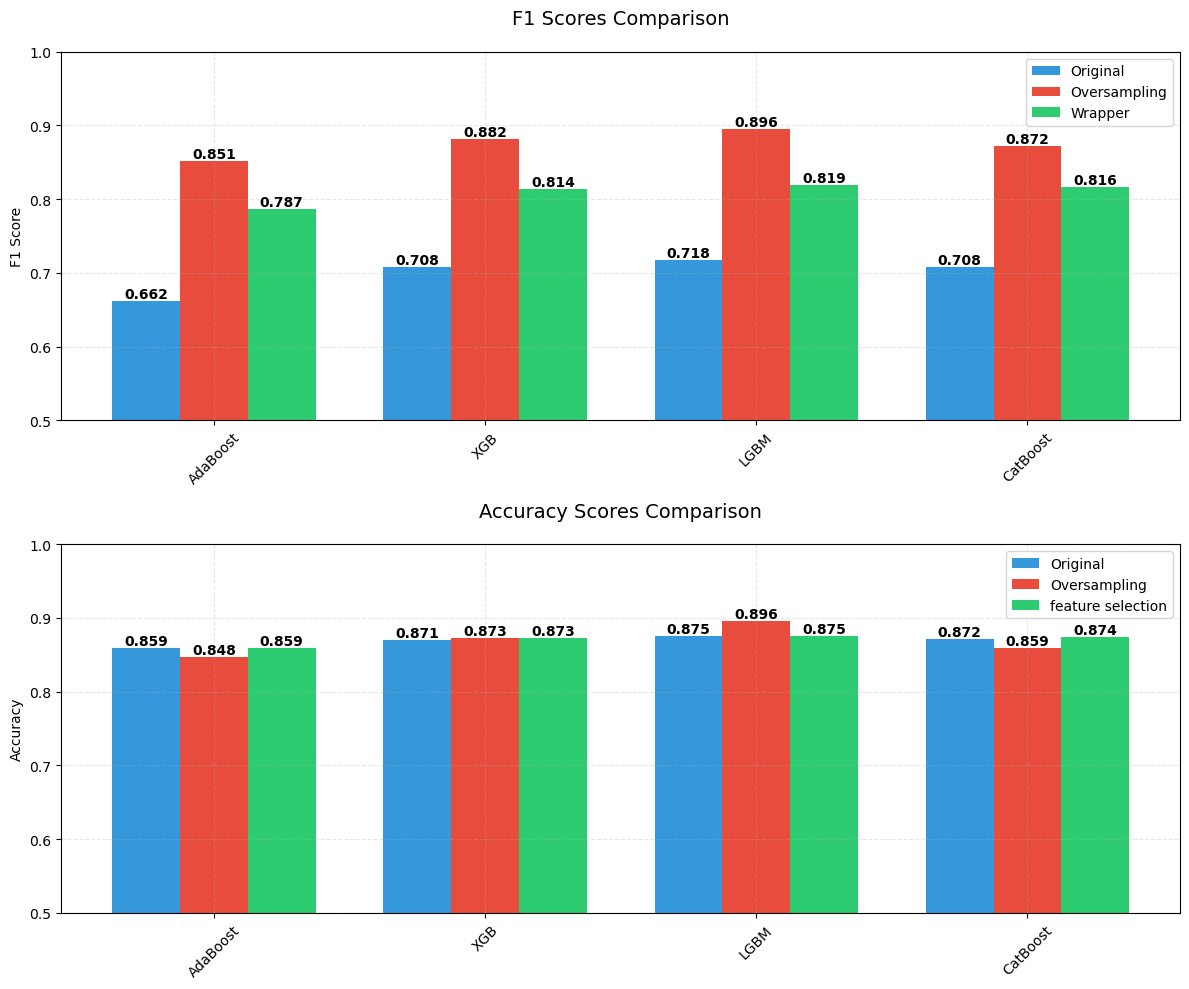


Performance Comparison Summary:
   Model  Original F1  Oversampling F1  Best feature selection F1  Original Acc  Oversampling Acc  Best feature selection Acc
AdaBoost     0.662093         0.851472                     0.7872      0.858839          0.847627                      0.8589
     XGB     0.707977         0.881985                     0.8144      0.870713          0.872708                      0.8726
    LGBM     0.717628         0.895516                     0.8188      0.875218          0.895833                      0.8752
CatBoost     0.707936         0.871880                     0.8160      0.871532          0.858819                      0.8741


In [29]:
# Updated results data with best scores
total_results_data = {
    'Original': {
        'F1': [float(f1.split(':')[1]) for f1 in f1_list],
        'Accuracy': [float(acc.split(':')[1]) for acc in acc_list]
    },
    'Oversampling': {
        'F1': [float(f1.split(':')[1]) for f1 in balance_f1_list],
        'Accuracy': [float(acc.split(':')[1]) for acc in balance_acc_list]
    },
    'Best feature selection': {
        'F1': [0.7872, 0.8144, 0.8188, 0.8160],  # Best F1 scores for each model
        'Accuracy': [0.8589, 0.8726, 0.8752, 0.8741]  # Best accuracy scores for each model
    }
}

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Set width of bars and positions
barWidth = 0.25
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth*2 for x in r1]

# Colors
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue for original, Red for oversampling, Green for best

# Plot F1 Scores
bars1 = ax1.bar(r1, total_results_data['Original']['F1'], width=barWidth, 
                color=colors[0], label='Original')
bars2 = ax1.bar(r2, total_results_data['Oversampling']['F1'], width=barWidth, 
                color=colors[1], label='Oversampling')
bars3 = ax1.bar(r3, total_results_data['Best feature selection']['F1'], width=barWidth, 
                color=colors[2], label='Wrapper')

# Add value labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars3:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('F1 Scores Comparison', pad=20, fontsize=14)
ax1.set_ylabel('F1 Score')
ax1.set_xticks([r + barWidth for r in range(len(model_names))])
ax1.set_xticklabels(model_names, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()
ax1.set_ylim(0.5, 1)

# Plot Accuracy Scores
bars4 = ax2.bar(r1, total_results_data['Original']['Accuracy'], width=barWidth, 
                color=colors[0], label='Original')
bars5 = ax2.bar(r2, total_results_data['Oversampling']['Accuracy'], width=barWidth, 
                color=colors[1], label='Oversampling')
bars6 = ax2.bar(r3, total_results_data['Best feature selection']['Accuracy'], width=barWidth, 
                color=colors[2], label='feature selection')

# Add value labels on top of the bars
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars5:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
for bar in bars6:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Accuracy Scores Comparison', pad=20, fontsize=14)
ax2.set_ylabel('Accuracy')
ax2.set_xticks([r + barWidth for r in range(len(model_names))])
ax2.set_xticklabels(model_names, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()
ax2.set_ylim(0.5, 1)

plt.tight_layout()
plt.show()

# Create summary table
summary_data = []
for i, model in enumerate(model_names):
    model_data = {
        'Model': model,
        'Original F1': total_results_data['Original']['F1'][i],
        'Oversampling F1': total_results_data['Oversampling']['F1'][i],
        'Best feature selection F1': total_results_data['Best feature selection']['F1'][i],
        'Original Acc': total_results_data['Original']['Accuracy'][i],
        'Oversampling Acc': total_results_data['Oversampling']['Accuracy'][i],
        'Best feature selection Acc': total_results_data['Best feature selection']['Accuracy'][i]
    }
    summary_data.append(model_data)

df_summary = pd.DataFrame(summary_data)

# Print summary table
print("\nPerformance Comparison Summary:")
print(df_summary.to_string(index=False))

## Key Findings
1. Wrapper method (RFE) consistently outperformed other feature selection techniques
2. LightGBM showed superior performance across metrics
3. Data balancing significantly improved model accuracy
4. Data balancing enhanced model robustness